In [20]:
import os
import torch

# Make only GPU 0 visible
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# After setting environment variable, import torch and select device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print("Using device:", device)

if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
    print("Available GPUs:", torch.cuda.device_count())
    print("Current device ID:", torch.cuda.current_device())
    print("Device name:", torch.cuda.get_device_name(torch.cuda.current_device()))
else:
    print("CUDA not available, using CPU.")


Using device: cuda:0
GPU Name: NVIDIA A100-PCIE-40GB
Available GPUs: 1
Current device ID: 0
Device name: NVIDIA A100-PCIE-40GB


In [21]:
!pip install matplotlib

In [22]:
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv("ProtBERT_embeddings.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,Target
0,0.061433,-0.093036,0.014880,0.058781,-0.105681,-0.028983,-0.085266,0.126793,-0.027066,-0.161722,...,-0.193578,-0.194424,0.039551,0.028460,-0.093006,0.115459,-0.065176,-0.035410,0.128550,1
1,0.076153,-0.103810,-0.005204,0.031166,-0.150368,-0.046833,-0.101078,0.111731,-0.033922,-0.145995,...,-0.204124,-0.175759,0.038569,0.050258,-0.075544,0.083503,-0.072082,-0.042128,0.125733,1
2,0.016253,-0.028925,0.019796,0.102283,-0.057433,-0.016488,0.011041,0.027083,0.000491,0.084934,...,0.045801,-0.015867,-0.024398,0.100314,-0.056038,0.034016,-0.025218,0.025722,0.020169,1
3,0.008884,-0.080340,0.006677,0.074434,-0.111960,-0.018007,0.016470,0.097251,-0.004586,0.041509,...,-0.035567,-0.093148,-0.073829,0.165202,-0.073934,0.014703,-0.024835,-0.076518,0.058073,1
4,0.032326,-0.091546,-0.007182,0.092512,-0.065961,-0.015888,-0.008175,0.054156,0.002718,0.014148,...,0.007148,-0.045643,-0.026938,0.141530,-0.057603,0.043327,-0.011102,-0.071511,0.066110,1


In [24]:
df.shape

(1313, 1025)

In [25]:
X = df.drop("Target",axis=1)
y = df["Target"]
X,y

(             0         1         2         3         4         5         6  \
 0     0.061433 -0.093036  0.014880  0.058781 -0.105681 -0.028983 -0.085266   
 1     0.076153 -0.103810 -0.005204  0.031166 -0.150368 -0.046833 -0.101078   
 2     0.016253 -0.028925  0.019796  0.102283 -0.057433 -0.016488  0.011041   
 3     0.008884 -0.080340  0.006677  0.074434 -0.111960 -0.018007  0.016470   
 4     0.032326 -0.091546 -0.007182  0.092512 -0.065961 -0.015888 -0.008175   
 ...        ...       ...       ...       ...       ...       ...       ...   
 1308  0.042859 -0.088698 -0.018298  0.085901 -0.000395  0.014532 -0.019336   
 1309  0.045621 -0.029705  0.016524 -0.007452 -0.028962 -0.016632 -0.002971   
 1310 -0.034534 -0.014819  0.023401  0.012767 -0.011230 -0.034790 -0.010354   
 1311  0.025859 -0.033762  0.015337 -0.049549  0.063521  0.017612 -0.011660   
 1312 -0.049556  0.000736  0.031788  0.006979 -0.015815 -0.035620 -0.005089   
 
              7         8         9  ...      1014

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.1, random_state=50)
X_train.shape, X_test.shape, X_val.shape

((919, 1024), (354, 1024), (40, 1024))

In [27]:
X_train.shape

(919, 1024)

In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install skorch

Note: you may need to restart the kernel to use updated packages.


--- Running Logistic Regression ---
Starting hyperparameter tuning...
Best hyperparameters: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

--- Evaluation Metrics ---
1. Accuracy (ACC): 0.9124
2. Specificity (SP): 0.9315
3. Precision (PRE): 0.8881
4. Sensitivity/Recall: 0.8815
5. F1 Score (F1): 0.8848
6. Matthews Correlation Coefficient (MCC): 0.8142
7. Area Under the Curve (AUC): 0.9599


--- Running Random Forest ---
Starting hyperparameter tuning...
Best hyperparameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}

--- Evaluation Metrics ---
1. Accuracy (ACC): 0.9068
2. Specificity (SP): 0.9498
3. Precision (PRE): 0.9113
4. Sensitivity/Recall: 0.8370
5. F1 Score (F1): 0.8726
6. Matthews Correlation Coefficient (MCC): 0.8011
7. Area Under the Curve (AUC): 0.9612


--- Running Gaussian Naive Bayes ---
Starting hyperparameter tuning...
Best hyperparameters: {'var_smoothing':

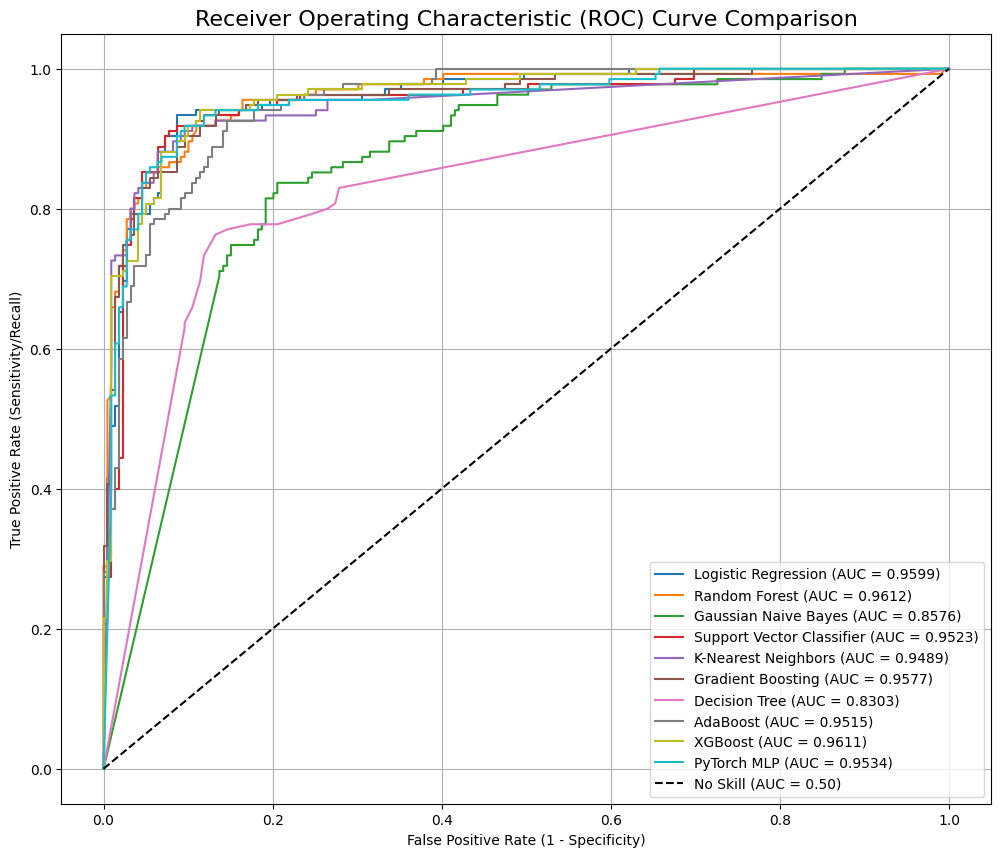

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    matthews_corrcoef,
    roc_curve,
)

# --- Scikit-learn and XGBoost Model Imports ---
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# ----- 1. Define the PyTorch MLP and Scikit-learn Wrapper -----

# The core PyTorch model
class Classifier(nn.Module):
    def __init__(self, input_dim, num_classes, hidden_dim=256, dropout=0.3):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            # Use 1 output for binary classification, num_classes for multi-class
            nn.Linear(hidden_dim, num_classes if num_classes > 2 else 1)
        )

    def forward(self, x):
        return self.layers(x)

# Scikit-learn style wrapper for the PyTorch model
class TorchMLPClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, num_classes=2, hidden_dim=256, dropout=0.3,
                 lr=1e-3, batch_size=64, epochs=20, device=None):
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.hidden_dim = hidden_dim
        self.dropout = dropout
        self.lr = lr
        self.batch_size = batch_size
        self.epochs = epochs
        self.device = device 
        self.model_ = None

    def fit(self, X, y):
        # Convert numpy arrays to torch tensors
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.long).to(self.device)

        dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
        loader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        self.model_ = Classifier(
            self.input_dim, self.num_classes,
            hidden_dim=self.hidden_dim, dropout=self.dropout
        ).to(self.device)

        # Define loss and optimizer
        criterion = nn.BCEWithLogitsLoss() if self.num_classes == 2 else nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model_.parameters(), lr=self.lr)

        # Training loop
        for epoch in range(self.epochs):
            self.model_.train()
            for xb, yb in loader:
                optimizer.zero_grad()
                logits = self.model_(xb)
                # Adjust target shape and type for binary vs multi-class
                if self.num_classes == 2:
                    loss = criterion(logits.view(-1), yb.float())
                else:
                    loss = criterion(logits, yb)
                loss.backward()
                optimizer.step()
        return self

    def predict(self, X):
        self.model_.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            logits = self.model_(X_tensor)
            if self.num_classes == 2:
                probs = torch.sigmoid(logits).cpu().numpy().ravel()
                return (probs >= 0.5).astype(int)
            else:
                return torch.argmax(logits, dim=1).cpu().numpy()

    def predict_proba(self, X):
        self.model_.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            logits = self.model_(X_tensor)
            if self.num_classes == 2:
                probs = torch.sigmoid(logits).cpu().numpy()
                # Return probabilities for both classes [P(0), P(1)]
                return np.hstack([1 - probs, probs])
            else:
                return torch.softmax(logits, dim=1).cpu().numpy()

    def score(self, X, y):
        preds = self.predict(X)
        return accuracy_score(y, preds)



# ----- 3. Model Definitions and Hyperparameter Grids -----
models_to_run = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=5000),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2', 'elasticnet', None],
            'solver': ['liblinear', 'lbfgs', 'saga'],
            'class_weight': [None, 'balanced']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 500],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None],
            'bootstrap': [True, False]
        }
    },
    'Gaussian Naive Bayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': np.logspace(-9, -6, 4)
        }
    },
    'Support Vector Classifier': {
        'model': SVC(random_state=42, probability=True),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
            'gamma': ['scale', 'auto'],
            'degree': [2, 3, 4],  # only for poly kernel
            'class_weight': [None, 'balanced']
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 15],
            'weights': ['uniform', 'distance'],
            'metric': ['minkowski', 'manhattan', 'euclidean'],
            'p': [1, 2]  # power parameter for Minkowski
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 500],
            'learning_rate': [0.001, 0.01, 0.1],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200, 500],
            'learning_rate': [0.001, 0.01, 0.1, 1.0],
            'algorithm': ['SAMME', 'SAMME.R']
        }
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(
            random_state=42, 
            use_label_encoder=False, 
            eval_metric='logloss'
        ),
        'params': {
            'n_estimators': [100, 200, 500],
            'learning_rate': [0.001, 0.01, 0.1],
            'max_depth': [3, 5, 7, 10],
            'subsample': [0.7, 0.8, 1.0],
            'colsample_bytree': [0.7, 0.8, 1.0],
            'gamma': [0, 0.1, 0.2, 0.5],
            'min_child_weight': [1, 3, 5]
        }
    }
    ,
    'PyTorch MLP': {
        'model': TorchMLPClassifier(input_dim=X_train.shape[1], num_classes=len(np.unique(y_train))),
        'params': {
            "hidden_dim": [64 ,128, 256, 512],
            "dropout": [0.01, 0.1, 0.3, 0.5],
            "lr": [1e-2,1e-3, 1e-4],
            "batch_size": [16,32, 64],
            "epochs": [20, 30, 50, 100]
        }
    }
}


# ----- 4. Main Evaluation Loop -----
plt.figure(figsize=(12, 10))

for name, config in models_to_run.items():
    print(f"--- Running {name} ---")
    
    print("Starting hyperparameter tuning...")
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring='roc_auc',
        cv=3,
        n_jobs=-1,
        verbose=0
    )
    # Ensure data is in the correct format (numpy array)
    grid_search.fit(np.array(X_train), np.array(y_train))
    best_model = grid_search.best_estimator_
    print(f"Best hyperparameters: {grid_search.best_params_}")
    
    y_pred = best_model.predict(np.array(X_test))
    y_pred_proba = best_model.predict_proba(np.array(X_test))[:, 1]

    print("\n--- Evaluation Metrics ---")
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    specificity = tn / (tn + fp)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    precision = report['1']['precision']
    sensitivity = report['1']['recall']
    f1 = report['1']['f1-score']
    mcc = matthews_corrcoef(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Print metrics
    print(f"1. Accuracy (ACC): {accuracy:.4f}")
    print(f"2. Specificity (SP): {specificity:.4f}")
    print(f"3. Precision (PRE): {precision:.4f}")
    print(f"4. Sensitivity/Recall: {sensitivity:.4f}")
    print(f"5. F1 Score (F1): {f1:.4f}")
    print(f"6. Matthews Correlation Coefficient (MCC): {mcc:.4f}")
    print(f"7. Area Under the Curve (AUC): {auc:.4f}")
    

    # Add ROC curve to plot
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')
    
    print("\n" + "="*50 + "\n")

# ----- 5. Finalize and Show Plot -----
plt.plot([0, 1], [0, 1], 'k--', label='No Skill (AUC = 0.50)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


--- Running Logistic Regression ---

--- Evaluation Metrics ---
1. Accuracy (ACC): 0.9124
2. Specificity (SP): 0.9315
3. Precision (PRE): 0.8881
4. Sensitivity/Recall: 0.8815
5. F1 Score (F1): 0.8848
6. Matthews Correlation Coefficient (MCC): 0.8142
7. Area Under the Curve (AUC): 0.9599


--- Running Random Forest ---

--- Evaluation Metrics ---
1. Accuracy (ACC): 0.9068
2. Specificity (SP): 0.9498
3. Precision (PRE): 0.9113
4. Sensitivity/Recall: 0.8370
5. F1 Score (F1): 0.8726
6. Matthews Correlation Coefficient (MCC): 0.8011
7. Area Under the Curve (AUC): 0.9612


--- Running Gaussian Naive Bayes ---

--- Evaluation Metrics ---
1. Accuracy (ACC): 0.8051
2. Specificity (SP): 0.8539
3. Precision (PRE): 0.7538
4. Sensitivity/Recall: 0.7259
5. F1 Score (F1): 0.7396
6. Matthews Correlation Coefficient (MCC): 0.5842
7. Area Under the Curve (AUC): 0.8576


--- Running Support Vector Classifier ---

--- Evaluation Metrics ---
1. Accuracy (ACC): 0.9153
2. Specificity (SP): 0.9315
3. Precisio

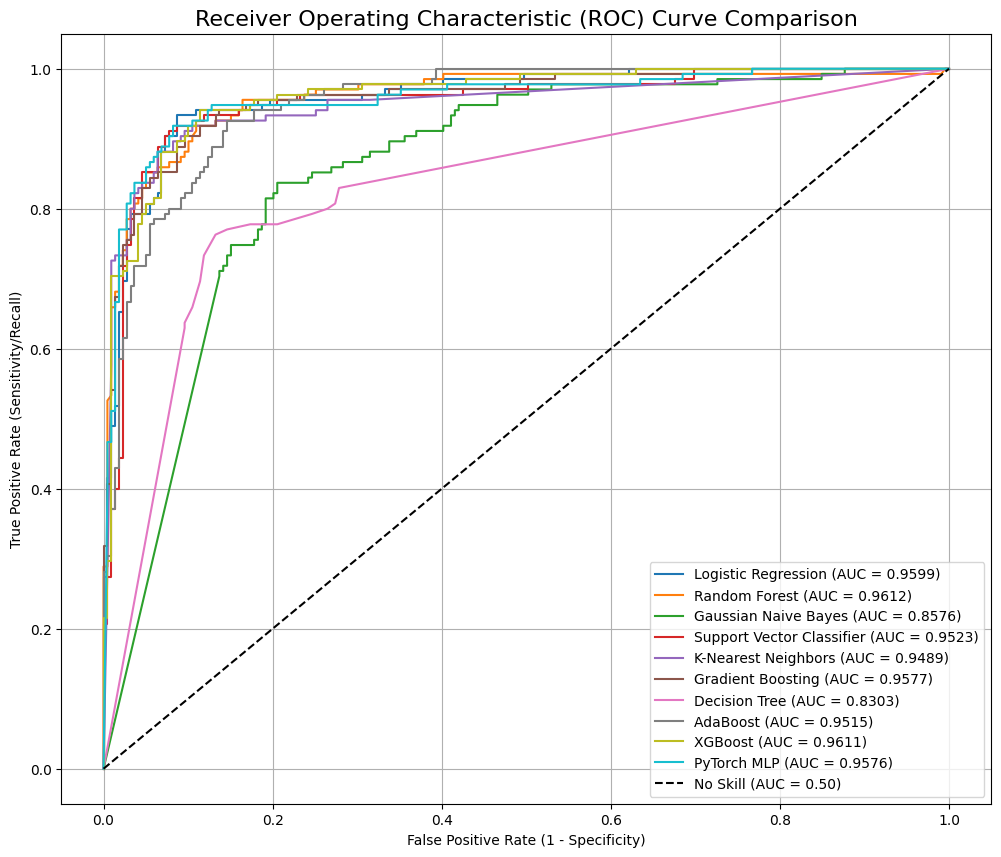

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    matthews_corrcoef,
    roc_curve,
)

# --- Scikit-learn and XGBoost Model Imports ---
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# ----- 1. Define the PyTorch MLP and Scikit-learn Wrapper -----

# The core PyTorch model
class Classifier(nn.Module):
    def __init__(self, input_dim, num_classes, hidden_dim=256, dropout=0.3):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            # Use 1 output for binary classification, num_classes for multi-class
            nn.Linear(hidden_dim, num_classes if num_classes > 2 else 1)
        )

    def forward(self, x):
        return self.layers(x)

# Scikit-learn style wrapper for the PyTorch model
class TorchMLPClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, num_classes=2, hidden_dim=256, dropout=0.3,
                 lr=1e-3, batch_size=64, epochs=20, device=None):
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.hidden_dim = hidden_dim
        self.dropout = dropout
        self.lr = lr
        self.batch_size = batch_size
        self.epochs = epochs
        self.device = device
        self.model_ = None

    def fit(self, X, y):
        # Convert numpy arrays to torch tensors
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.long).to(self.device)

        dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
        loader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        self.model_ = Classifier(
            self.input_dim, self.num_classes,
            hidden_dim=self.hidden_dim, dropout=self.dropout
        ).to(self.device)

        # Define loss and optimizer
        criterion = nn.BCEWithLogitsLoss() if self.num_classes == 2 else nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model_.parameters(), lr=self.lr)

        # Training loop
        for epoch in range(self.epochs):
            self.model_.train()
            for xb, yb in loader:
                optimizer.zero_grad()
                logits = self.model_(xb)
                # Adjust target shape and type for binary vs multi-class
                if self.num_classes == 2:
                    loss = criterion(logits.view(-1), yb.float())
                else:
                    loss = criterion(logits, yb)
                loss.backward()
                optimizer.step()
        return self

    def predict(self, X):
        self.model_.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            logits = self.model_(X_tensor)
            if self.num_classes == 2:
                probs = torch.sigmoid(logits).cpu().numpy().ravel()
                return (probs >= 0.5).astype(int)
            else:
                return torch.argmax(logits, dim=1).cpu().numpy()

    def predict_proba(self, X):
        self.model_.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            logits = self.model_(X_tensor)
            if self.num_classes == 2:
                probs = torch.sigmoid(logits).cpu().numpy()
                # Return probabilities for both classes [P(0), P(1)]
                return np.hstack([1 - probs, probs])
            else:
                return torch.softmax(logits, dim=1).cpu().numpy()

    def score(self, X, y):
        preds = self.predict(X)
        return accuracy_score(y, preds)


# ----- 3. Model Definitions with Best Hyperparameters -----
# The models are instantiated with the optimal parameters you found.
best_models = {
    'Logistic Regression': LogisticRegression(
        C=10, class_weight='balanced', penalty='l2', solver='lbfgs',
        random_state=42, max_iter=5000
    ),
    'Random Forest': RandomForestClassifier(
        bootstrap=False, max_depth=20, max_features='sqrt',
        min_samples_leaf=2, min_samples_split=2, n_estimators=500,
        random_state=42 
        
    ),
    'Gaussian Naive Bayes': GaussianNB(
        var_smoothing=1e-07
    ),
    'Support Vector Classifier': SVC(
        C=10, class_weight='balanced', degree=2, gamma='scale', kernel='rbf',
        probability=True, random_state=42
    ),
    'K-Nearest Neighbors': KNeighborsClassifier(
        metric='minkowski', n_neighbors=9, p=1, weights='distance'
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        learning_rate=0.1, max_depth=3, max_features='log2',
        min_samples_leaf=2, min_samples_split=5, n_estimators=500,
        subsample=0.8, random_state=42
    ),
    'Decision Tree': DecisionTreeClassifier(
        criterion='entropy', max_depth=10, max_features='log2',
        min_samples_leaf=4, min_samples_split=10, random_state=42
    ),
    'AdaBoost': AdaBoostClassifier(
        algorithm='SAMME', learning_rate=0.1, n_estimators=500, random_state=42
    ),
    'XGBoost': xgb.XGBClassifier(
        colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7,
        min_child_weight=1, n_estimators=500, subsample=0.8,
        use_label_encoder=False, eval_metric='logloss', random_state=42
    ),
    'PyTorch MLP': TorchMLPClassifier(
        input_dim=X_train.shape[1],
        num_classes=len(np.unique(y_train)),
        batch_size=16,
        dropout=0.01,
        epochs=20,
        hidden_dim=64,
        lr=0.01
    )
}


# ----- 4. Main Evaluation Loop -----
plt.figure(figsize=(12, 10))

for name, model in best_models.items():
    print(f"--- Running {name} ---")

    # Fit the model
    model.fit(np.array(X_train), np.array(y_train))

    # Get predictions
    y_pred = model.predict(np.array(X_test))
    y_pred_proba = model.predict_proba(np.array(X_test))[:, 1]

    print("\n--- Evaluation Metrics ---")
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    specificity = tn / (tn + fp)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    precision = report['1']['precision']
    sensitivity = report['1']['recall']
    f1 = report['1']['f1-score']
    mcc = matthews_corrcoef(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Print metrics
    print(f"1. Accuracy (ACC): {accuracy:.4f}")
    print(f"2. Specificity (SP): {specificity:.4f}")
    print(f"3. Precision (PRE): {precision:.4f}")
    print(f"4. Sensitivity/Recall: {sensitivity:.4f}")
    print(f"5. F1 Score (F1): {f1:.4f}")
    print(f"6. Matthews Correlation Coefficient (MCC): {mcc:.4f}")
    print(f"7. Area Under the Curve (AUC): {auc:.4f}")

    # Add ROC curve to plot
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')

    print("\n" + "="*50 + "\n")

# ----- 5. Finalize and Show Plot -----
plt.plot([0, 1], [0, 1], 'k--', label='No Skill (AUC = 0.50)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


--- Running Logistic Regression ---

--- Evaluation Metrics ---
1. Accuracy (ACC): 0.9124
2. Specificity (SP): 0.9315
3. Precision (PRE): 0.8881
4. Sensitivity/Recall: 0.8815
5. F1 Score (F1): 0.8848
6. Matthews Correlation Coefficient (MCC): 0.8142
7. Area Under the Curve (AUC): 0.9599


--- Running Random Forest ---

--- Evaluation Metrics ---
1. Accuracy (ACC): 0.9068
2. Specificity (SP): 0.9498
3. Precision (PRE): 0.9113
4. Sensitivity/Recall: 0.8370
5. F1 Score (F1): 0.8726
6. Matthews Correlation Coefficient (MCC): 0.8011
7. Area Under the Curve (AUC): 0.9612


--- Running Support Vector Classifier ---

--- Evaluation Metrics ---
1. Accuracy (ACC): 0.9153
2. Specificity (SP): 0.9315
3. Precision (PRE): 0.8889
4. Sensitivity/Recall: 0.8889
5. F1 Score (F1): 0.8889
6. Matthews Correlation Coefficient (MCC): 0.8204
7. Area Under the Curve (AUC): 0.9523


--- Running K-Nearest Neighbors ---

--- Evaluation Metrics ---
1. Accuracy (ACC): 0.9096
2. Specificity (SP): 0.9361
3. Precision

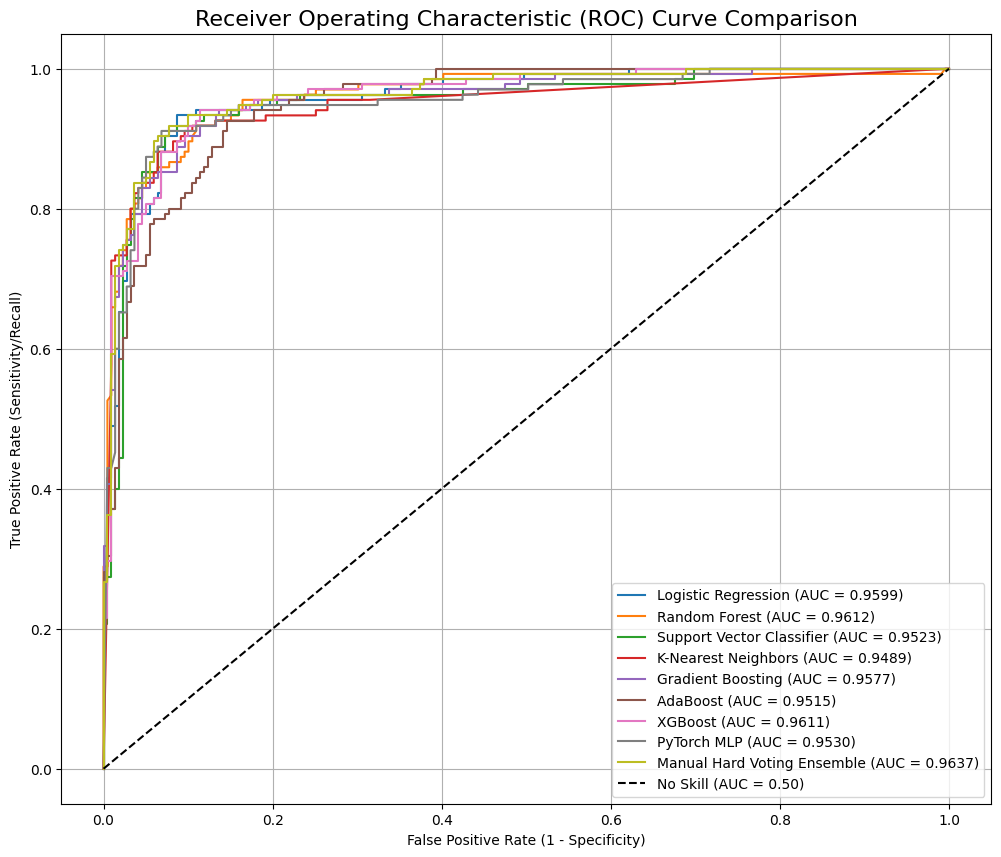

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    matthews_corrcoef,
    roc_curve,
)
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder

# --- Scikit-learn and XGBoost Model Imports ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb



# ----- 2. Define the PyTorch MLP and Scikit-learn Wrapper -----
# The core PyTorch model
class Classifier(nn.Module):
    def __init__(self, input_dim, num_classes, hidden_dim=256, dropout=0.3):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, num_classes if num_classes > 2 else 1)
        )

    def forward(self, x):
        return self.layers(x)

# Scikit-learn style wrapper for the PyTorch model
class TorchMLPClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, num_classes=2, hidden_dim=256, dropout=0.3,
                 lr=1e-3, batch_size=64, epochs=20, device=None):
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.hidden_dim = hidden_dim
        self.dropout = dropout
        self.lr = lr
        self.batch_size = batch_size
        self.epochs = epochs
        self.device = device or ("cuda" if torch.cuda.is_available() else "cpu")
        self.model_ = None
        self.classes_ = np.arange(num_classes)

    def fit(self, X, y):
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.long).to(self.device)
        dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
        loader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)
        self.model_ = Classifier(
            self.input_dim, self.num_classes,
            hidden_dim=self.hidden_dim, dropout=self.dropout
        ).to(self.device)
        criterion = nn.BCEWithLogitsLoss() if self.num_classes == 2 else nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model_.parameters(), lr=self.lr)
        for epoch in range(self.epochs):
            self.model_.train()
            for xb, yb in loader:
                optimizer.zero_grad()
                logits = self.model_(xb)
                if self.num_classes == 2:
                    loss = criterion(logits.view(-1), yb.float())
                else:
                    loss = criterion(logits, yb)
                loss.backward()
                optimizer.step()
        return self

    def predict(self, X):
        self.model_.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            logits = self.model_(X_tensor)
            if self.num_classes == 2:
                probs = torch.sigmoid(logits).cpu().numpy().ravel()
                return (probs >= 0.5).astype(int)
            else:
                return torch.argmax(logits, dim=1).cpu().numpy()

    def predict_proba(self, X):
        self.model_.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            logits = self.model_(X_tensor)
            if self.num_classes == 2:
                probs = torch.sigmoid(logits).cpu().numpy()
                return np.hstack([1 - probs, probs])
            else:
                return torch.softmax(logits, dim=1).cpu().numpy()

# ----- 3. Manually Create a Hard Voting Ensemble Classifier -----
class ManualHardVotingClassifier(BaseEstimator, ClassifierMixin):
    """A custom hard-voting ensemble classifier."""
    def __init__(self, estimators):
        # estimators is a list of tuples: [('name1', model1), ('name2', model2), ...]
        self.estimators = estimators
        self.named_estimators_ = dict(estimators)
        self.le_ = LabelEncoder()

    def fit(self, X, y):
        """Train all base estimators on the training data."""
        self.le_.fit(y)
        self.classes_ = self.le_.classes_

        # Create a clean, fitted copy of each estimator
        self.estimators_ = []
        for _, estimator in self.estimators:
            fitted_estimator = clone(estimator).fit(X, y)
            self.estimators_.append(fitted_estimator)
        return self

    def predict(self, X):
        """
        Predict class labels by majority rule (hard voting).
        """
        # 1. Get predictions from each individual fitted model
        predictions = np.asarray([est.predict(X) for est in self.estimators_]).T

        # 2. For each sample, find the most frequent prediction (the mode)
        #    This is the core of hard voting.
        majority_vote = mode(predictions, axis=1, keepdims=False)[0]
        return majority_vote

    def predict_proba(self, X):
        """
        Average the probabilities of the base estimators.
        This is required for calculating the ROC AUC score.
        """
        # Collect probabilities from all estimators that support it
        all_probas = [
            est.predict_proba(X) for est in self.estimators_
            if hasattr(est, 'predict_proba')
        ]
        
        if not all_probas:
            raise AttributeError("None of the base estimators support predict_proba.")

        # Average the probabilities across all models
        avg_proba = np.mean(all_probas, axis=0)
        return avg_proba

# ----- 4. Model Definitions -----
# We will use this dictionary to instantiate both individual models and the ensemble
base_models = {
    'Logistic Regression': LogisticRegression(
        C=10, class_weight='balanced', penalty='l2', solver='lbfgs',
        random_state=42, max_iter=5000
    ),
    'Random Forest': RandomForestClassifier(
        bootstrap=False, max_depth=20, max_features='sqrt',
        min_samples_leaf=2, min_samples_split=2, n_estimators=500,
        random_state=42
    ),
    'Support Vector Classifier': SVC(
        C=10, class_weight='balanced', degree=2, gamma='scale', kernel='rbf',
        probability=True, random_state=42
    ),
    'K-Nearest Neighbors': KNeighborsClassifier(
        metric='minkowski', n_neighbors=9, p=1, weights='distance'
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        learning_rate=0.1, max_depth=3, max_features='log2',
        min_samples_leaf=2, min_samples_split=5, n_estimators=500,
        subsample=0.8, random_state=42
    ),
    'AdaBoost': AdaBoostClassifier(
        learning_rate=0.1, n_estimators=500, random_state=42
    ),
    'XGBoost': xgb.XGBClassifier(
        colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7,
        min_child_weight=1, n_estimators=500, subsample=0.8,
        use_label_encoder=False, eval_metric='logloss', random_state=42
    ),
    'PyTorch MLP': TorchMLPClassifier(
        input_dim=X_train.shape[1],
        num_classes=len(np.unique(y_train)),
        batch_size=16, dropout=0.01, epochs=20, hidden_dim=64, lr=0.01
    )
}

# Create the manual ensemble using the models defined above
manual_ensemble = ManualHardVotingClassifier(estimators=list(base_models.items()))

# Combine all models to be evaluated into a single dictionary
models_to_run = base_models.copy()
models_to_run['Manual Hard Voting Ensemble'] = manual_ensemble


# ----- 5. Main Evaluation Loop -----
plt.figure(figsize=(12, 10))


# Create an empty list to store metrics for each model
results = []

for name, model in models_to_run.items():
    print(f"--- Running {name} ---")

    # Fit the model
    model.fit(np.array(X_train), np.array(y_train))

    # Get predictions
    y_pred = model.predict(np.array(X_test))
    y_pred_proba = model.predict_proba(np.array(X_test))[:, 1]

    print("\n--- Evaluation Metrics ---")
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    specificity = tn / (tn + fp)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    precision = report['1']['precision']
    sensitivity = report['1']['recall']
    f1 = report['1']['f1-score']
    mcc = matthews_corrcoef(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Print metrics
    print(f"1. Accuracy (ACC): {accuracy:.4f}")
    print(f"2. Specificity (SP): {specificity:.4f}")
    print(f"3. Precision (PRE): {precision:.4f}")
    print(f"4. Sensitivity/Recall: {sensitivity:.4f}")
    print(f"5. F1 Score (F1): {f1:.4f}")
    print(f"6. Matthews Correlation Coefficient (MCC): {mcc:.4f}")
    print(f"7. Area Under the Curve (AUC): {auc:.4f}")

    # Save metrics to list
    results.append({
        'Model': name,
        'Accuracy (ACC)': round(accuracy, 4),
        'Specificity (SP)': round(specificity, 4),
        'Precision (PRE)': round(precision, 4),
        'Sensitivity/Recall': round(sensitivity, 4),
        'F1 Score (F1)': round(f1, 4),
        'Matthews CorrCoef (MCC)': round(mcc, 4),
        'Area Under Curve (AUC)': round(auc, 4)
    })

    # Add ROC curve to plot
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')

    print("\n" + "="*50 + "\n")

# ----- 5. Create DataFrame and Save to Excel -----
df_results = pd.DataFrame(results)
df_results.to_csv("model_performance_ProtBERT.csv", index=False)

print("✅ Model performance metrics saved to 'model_performance.xlsx'")

# ----- 6. Finalize and Show Plot -----
plt.plot([0, 1], [0, 1], 'k--', label='No Skill (AUC = 0.50)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


--- Running Logistic Regression ---

--- Evaluation Metrics : Testing ---
1. Accuracy (ACC): 0.9124
2. Specificity (SP): 0.9315
3. Precision (PRE): 0.8881
4. Sensitivity/Recall: 0.8815
5. F1 Score (F1): 0.8848
6. Matthews Correlation Coefficient (MCC): 0.8142
7. Area Under the Curve (AUC): 0.9599


--- Running Random Forest ---

--- Evaluation Metrics : Testing ---
1. Accuracy (ACC): 0.9068
2. Specificity (SP): 0.9498
3. Precision (PRE): 0.9113
4. Sensitivity/Recall: 0.8370
5. F1 Score (F1): 0.8726
6. Matthews Correlation Coefficient (MCC): 0.8011
7. Area Under the Curve (AUC): 0.9612


--- Running Support Vector Classifier ---

--- Evaluation Metrics : Testing ---
1. Accuracy (ACC): 0.9153
2. Specificity (SP): 0.9315
3. Precision (PRE): 0.8889
4. Sensitivity/Recall: 0.8889
5. F1 Score (F1): 0.8889
6. Matthews Correlation Coefficient (MCC): 0.8204
7. Area Under the Curve (AUC): 0.9523


--- Running K-Nearest Neighbors ---

--- Evaluation Metrics : Testing ---
1. Accuracy (ACC): 0.9096


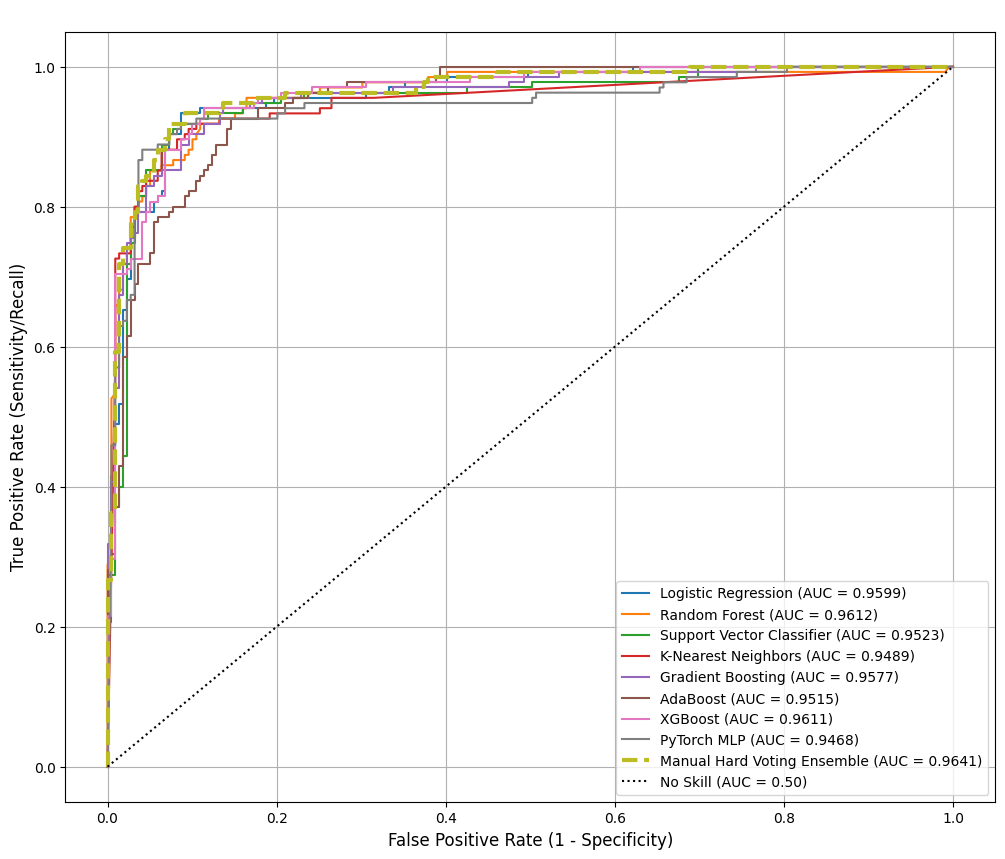

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
# CHANGED: Added pickle for saving models
import pickle

from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    matthews_corrcoef,
    roc_curve,
)
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder

# --- Scikit-learn and XGBoost Model Imports ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


# ----- 2. Define the PyTorch MLP and Scikit-learn Wrapper -----
# The core PyTorch model
class Classifier(nn.Module):
    def __init__(self, input_dim, num_classes, hidden_dim=256, dropout=0.3):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, num_classes if num_classes > 2 else 1)
        )

    def forward(self, x):
        return self.layers(x)

# Scikit-learn style wrapper for the PyTorch model
class TorchMLPClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, num_classes=2, hidden_dim=256, dropout=0.3,
                 lr=1e-3, batch_size=64, epochs=20, device=None):
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.hidden_dim = hidden_dim
        self.dropout = dropout
        self.lr = lr
        self.batch_size = batch_size
        self.epochs = epochs
        self.device = device
        self.model_ = None
        self.classes_ = np.arange(num_classes)

    def fit(self, X, y):
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.long).to(self.device)
        dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
        loader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)
        self.model_ = Classifier(
            self.input_dim, self.num_classes,
            hidden_dim=self.hidden_dim, dropout=self.dropout
        ).to(self.device)
        criterion = nn.BCEWithLogitsLoss() if self.num_classes == 2 else nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model_.parameters(), lr=self.lr)
        for epoch in range(self.epochs):
            self.model_.train()
            for xb, yb in loader:
                optimizer.zero_grad()
                logits = self.model_(xb)
                if self.num_classes == 2:
                    loss = criterion(logits.view(-1), yb.float())
                else:
                    loss = criterion(logits, yb)
                loss.backward()
                optimizer.step()
        return self

    def predict(self, X):
        self.model_.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            logits = self.model_(X_tensor)
            if self.num_classes == 2:
                probs = torch.sigmoid(logits).cpu().numpy().ravel()
                return (probs >= 0.5).astype(int)
            else:
                return torch.argmax(logits, dim=1).cpu().numpy()

    def predict_proba(self, X):
        self.model_.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            logits = self.model_(X_tensor)
            if self.num_classes == 2:
                probs = torch.sigmoid(logits).cpu().numpy()
                return np.hstack([1 - probs, probs])
            else:
                return torch.softmax(logits, dim=1).cpu().numpy()

# ----- 3. Manually Create a Hard Voting Ensemble Classifier -----
class ManualHardVotingClassifier(BaseEstimator, ClassifierMixin):
    """A custom hard-voting ensemble classifier."""
    def __init__(self, estimators):
        # estimators is a list of tuples: [('name1', model1), ('name2', model2), ...]
        self.estimators = estimators
        self.named_estimators_ = dict(estimators)
        self.le_ = LabelEncoder()

    def fit(self, X, y):
        """Train all base estimators on the training data."""
        self.le_.fit(y)
        self.classes_ = self.le_.classes_

        # Create a clean, fitted copy of each estimator
        self.estimators_ = []
        for _, estimator in self.estimators:
            fitted_estimator = clone(estimator).fit(X, y)
            self.estimators_.append(fitted_estimator)
        return self

    def predict(self, X):
        """
        Predict class labels by majority rule (hard voting).
        """
        # 1. Get predictions from each individual fitted model
        predictions = np.asarray([est.predict(X) for est in self.estimators_]).T

        # 2. For each sample, find the most frequent prediction (the mode)
        #    This is the core of hard voting.
        majority_vote = mode(predictions, axis=1, keepdims=False)[0]
        return majority_vote

    def predict_proba(self, X):
        """
        Average the probabilities of the base estimators.
        This is required for calculating the ROC AUC score.
        """
        # Collect probabilities from all estimators that support it
        all_probas = [
            est.predict_proba(X) for est in self.estimators_
            if hasattr(est, 'predict_proba')
        ]
        
        if not all_probas:
            raise AttributeError("None of the base estimators support predict_proba.")

        # Average the probabilities across all models
        avg_proba = np.mean(all_probas, axis=0)
        return avg_proba

# ----- 4. Model Definitions -----
# We will use this dictionary to instantiate both individual models and the ensemble
base_models = {
    'Logistic Regression': LogisticRegression(
        C=10, class_weight='balanced', penalty='l2', solver='lbfgs',
        random_state=42, max_iter=5000
    ),
    'Random Forest': RandomForestClassifier(
        bootstrap=False, max_depth=20, max_features='sqrt',
        min_samples_leaf=2, min_samples_split=2, n_estimators=500,
        random_state=42
    ),
    'Support Vector Classifier': SVC(
        C=10, class_weight='balanced', degree=2, gamma='scale', kernel='rbf',
        probability=True, random_state=42
    ),
    'K-Nearest Neighbors': KNeighborsClassifier(
        metric='minkowski', n_neighbors=9, p=1, weights='distance'
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        learning_rate=0.1, max_depth=3, max_features='log2',
        min_samples_leaf=2, min_samples_split=5, n_estimators=500,
        subsample=0.8, random_state=42
    ),
    'AdaBoost': AdaBoostClassifier(
        learning_rate=0.1, n_estimators=500, random_state=42
    ),
    'XGBoost': xgb.XGBClassifier(
        colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7,
        min_child_weight=1, n_estimators=500, subsample=0.8,
        use_label_encoder=False, eval_metric='logloss', random_state=42
    ),
    'PyTorch MLP': TorchMLPClassifier(
        input_dim=X_train.shape[1],
        num_classes=len(np.unique(y_train)),
        batch_size=16, dropout=0.01, epochs=20, hidden_dim=64, lr=0.01
    )
}

# Create the manual ensemble using the models defined above
manual_ensemble = ManualHardVotingClassifier(estimators=list(base_models.items()))

# Combine all models to be evaluated into a single dictionary
models_to_run = base_models.copy()
models_to_run['Manual Hard Voting Ensemble'] = manual_ensemble


# ----- 5. Main Evaluation Loop -----
plt.figure(figsize=(12, 10))


for name, model in models_to_run.items():
    print(f"--- Running {name} ---")

    # Fit the model
    model.fit(np.array(X_train), np.array(y_train))

    
    #test accuracy
    y_pred = model.predict(np.array(X_test))
    
    # Get probabilities for ROC AUC calculation
    y_pred_proba = model.predict_proba(np.array(X_test))[:, 1]

    print("\n--- Evaluation Metrics : Testing ---")
    try:
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
    except ValueError:
        specificity = float('nan') # Handle cases where confusion matrix is 1x1

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    precision = report.get('1', {}).get('precision', 0)
    sensitivity = report.get('1', {}).get('recall', 0) # Same as recall
    f1 = report.get('1', {}).get('f1-score', 0)
    mcc = matthews_corrcoef(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Print metrics
    print(f"1. Accuracy (ACC): {accuracy:.4f}")
    print(f"2. Specificity (SP): {specificity:.4f}")
    print(f"3. Precision (PRE): {precision:.4f}")
    print(f"4. Sensitivity/Recall: {sensitivity:.4f}")
    print(f"5. F1 Score (F1): {f1:.4f}")
    print(f"6. Matthews Correlation Coefficient (MCC): {mcc:.4f}")
    print(f"7. Area Under the Curve (AUC): {auc:.4f}")

    # Add ROC curve to plot
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    linewidth = 3 if 'Ensemble' in name else 1.5
    linestyle = '--' if 'Ensemble' in name else '-'
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})', linewidth=linewidth, linestyle=linestyle)

    print("\n" + "="*50 + "\n")

# ----- 6. Finalize and Show Plot -----
plt.plot([0, 1], [0, 1], 'k:', label='No Skill (AUC = 0.50)')
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity/Recall)', fontsize=12)
plt.title(" ")
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("ROC_curve_for_PROTBERT_model.png",dpi = 300)
plt.show()


In [34]:
# ----- 7. Save All Trained Models to Disk -----
# CHANGED: Added this new section to pickle every trained model.
print("--- Saving Trained Models ---")
for name, model in models_to_run.items():
    # Sanitize the model name to create a valid filename
    filename = f"./ProtBERT_models/{name.lower().replace(' ', '_')}_model_ProtBERT.pkl"
    
    try:
        with open(filename, 'wb') as f:
            pickle.dump(model, f)
        print(f"Successfully saved '{name}' to '{filename}'")
    except Exception as e:
        print(f"Error saving '{name}': {e}")

print("\nAll models have been saved.")

--- Saving Trained Models ---
Successfully saved 'Logistic Regression' to './ProtBERT_models/logistic_regression_model_ProtBERT.pkl'
Successfully saved 'Random Forest' to './ProtBERT_models/random_forest_model_ProtBERT.pkl'
Successfully saved 'Support Vector Classifier' to './ProtBERT_models/support_vector_classifier_model_ProtBERT.pkl'
Successfully saved 'K-Nearest Neighbors' to './ProtBERT_models/k-nearest_neighbors_model_ProtBERT.pkl'
Successfully saved 'Gradient Boosting' to './ProtBERT_models/gradient_boosting_model_ProtBERT.pkl'
Successfully saved 'AdaBoost' to './ProtBERT_models/adaboost_model_ProtBERT.pkl'
Successfully saved 'XGBoost' to './ProtBERT_models/xgboost_model_ProtBERT.pkl'
Successfully saved 'PyTorch MLP' to './ProtBERT_models/pytorch_mlp_model_ProtBERT.pkl'
Successfully saved 'Manual Hard Voting Ensemble' to './ProtBERT_models/manual_hard_voting_ensemble_model_ProtBERT.pkl'

All models have been saved.


Models loaded successfully :  logistic_regression_model_ProtBERT.pkl
1. Accuracy (ACC): 0.8750
2. Specificity (SP): 0.9406
3. Precision (PRE): 0.9008
4. Sensitivity/Recall: 0.8741
5. F1 Score (F1): 0.8872
6. Matthews Correlation Coefficient (MCC): 0.8196
7. Area Under the Curve (AUC): 0.9641





Models loaded successfully :  random_forest_model_ProtBERT.pkl
1. Accuracy (ACC): 0.8500
2. Specificity (SP): 0.9406
3. Precision (PRE): 0.9008
4. Sensitivity/Recall: 0.8741
5. F1 Score (F1): 0.8872
6. Matthews Correlation Coefficient (MCC): 0.8196
7. Area Under the Curve (AUC): 0.9641





Models loaded successfully :  k-nearest_neighbors_model_ProtBERT.pkl
1. Accuracy (ACC): 0.8500
2. Specificity (SP): 0.9406
3. Precision (PRE): 0.9008
4. Sensitivity/Recall: 0.8741
5. F1 Score (F1): 0.8872
6. Matthews Correlation Coefficient (MCC): 0.8196
7. Area Under the Curve (AUC): 0.9641





Models loaded successfully :  manual_hard_voting_ensemble_model_ProtBERT.pkl
1. Accuracy (ACC): 0.8250
2. Specif

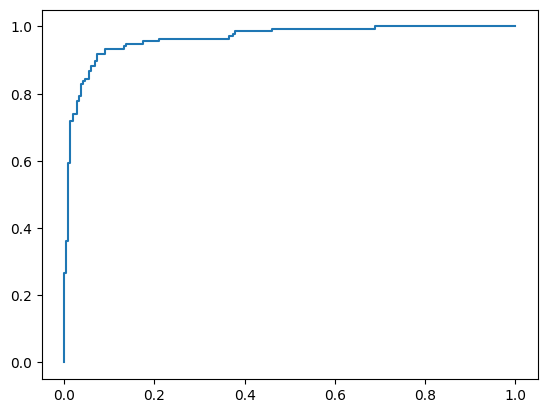

In [52]:
import os
val_results = []
for m_model in os.listdir("./ProtBERT_models/"):
    if m_model!=".ipynb_checkpoints":
        with open(f"./ProtBERT_models/{m_model}", 'rb') as f:
                    model = pickle.load(f)
        print("Models loaded successfully : ",m_model)
        y_val_pred = model.predict(np.array(X_val))
        accuracy = accuracy_score(y_val, y_val_pred)
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        precision = report.get('1', {}).get('precision', 0)
        sensitivity = report.get('1', {}).get('recall', 0) # Same as recall
        f1 = report.get('1', {}).get('f1-score', 0)
        mcc = matthews_corrcoef(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_proba)
        
        # Print metrics
        print(f"1. Accuracy (ACC): {accuracy:.4f}")
        print(f"2. Specificity (SP): {specificity:.4f}")
        print(f"3. Precision (PRE): {precision:.4f}")
        print(f"4. Sensitivity/Recall: {sensitivity:.4f}")
        print(f"5. F1 Score (F1): {f1:.4f}")
        print(f"6. Matthews Correlation Coefficient (MCC): {mcc:.4f}")
        print(f"7. Area Under the Curve (AUC): {auc:.4f}")
        print("\n\n")
         # Save metrics to list
        val_results.append({
            'Model': m_model,
            'Accuracy (ACC)': round(accuracy, 4),
            'Specificity (SP)': round(specificity, 4),
            'Precision (PRE)': round(precision, 4),
            'Sensitivity/Recall': round(sensitivity, 4),
            'F1 Score (F1)': round(f1, 4),
            'Matthews CorrCoef (MCC)': round(mcc, 4),
            'Area Under Curve (AUC)': round(auc, 4)
        })
    
      
    
        print("\n" + "="*50 + "\n")

# ----- 5. Create DataFrame and Save to Excel -----
df_results = pd.DataFrame(val_results)
df_results.to_csv("Validation_model_performance_ProtBERT.csv", index=False)

  # Add ROC curve to plot
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')

In [46]:
import pickle
import numpy as np
import torch
import torch.nn as nn
import re
from transformers import BertModel, BertTokenizer
from scipy.stats import mode
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import LabelEncoder

# --- 1. Required Class Definitions for Unpickling ---
# IMPORTANT: The definitions of your custom classes must be present
# for pickle to be able to load the models correctly.

# A. PyTorch Model and Wrapper Definitions
class Classifier(nn.Module):
    """Core PyTorch model definition."""
    def __init__(self, input_dim, num_classes, hidden_dim=256, dropout=0.3):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, num_classes if num_classes > 2 else 1)
        )

    def forward(self, x):
        return self.layers(x)

class TorchMLPClassifier(BaseEstimator, ClassifierMixin):
    """Scikit-learn style wrapper for the PyTorch model."""
    def __init__(self, input_dim, num_classes=2, hidden_dim=256, dropout=0.3,
                 lr=1e-3, batch_size=64, epochs=20, device=None):
        self.input_dim = input_dim
        self.num_classes = num_classes
        # ... (rest of __init__ is not essential for prediction)

    # Only predict/predict_proba are needed for inference.
    def predict(self, X):
        self.model_.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            logits = self.model_(X_tensor)
            if self.num_classes == 2:
                probs = torch.sigmoid(logits).cpu().numpy().ravel()
                return (probs >= 0.5).astype(int)
            else:
                return torch.argmax(logits, dim=1).cpu().numpy()

    def predict_proba(self, X):
        self.model_.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            logits = self.model_(X_tensor)
            if self.num_classes == 2:
                probs = torch.sigmoid(logits).cpu().numpy()
                return np.hstack([1 - probs, probs])
            else:
                return torch.softmax(logits, dim=1).cpu().numpy()

# B. Manual Hard Voting Ensemble Classifier Definition
class ManualHardVotingClassifier(BaseEstimator, ClassifierMixin):
    """Custom hard-voting ensemble classifier definition."""
    def __init__(self, estimators):
        self.estimators = estimators
    
    # The 'fit' method is not needed as the model is pre-trained.
    def predict(self, X):
        predictions = np.asarray([est.predict(X) for est in self.estimators_]).T
        majority_vote = mode(predictions, axis=1, keepdims=False)[0]
        return majority_vote

    def predict_proba(self, X):
        all_probas = [est.predict_proba(X) for est in self.estimators_ if hasattr(est, 'predict_proba')]
        if not all_probas:
            raise AttributeError("None of the base estimators support predict_proba.")
        avg_proba = np.mean(all_probas, axis=0)
        return avg_proba


# --- 2. ProtBERT Feature Extraction ---
def get_protbert_embedding(sequence, model, tokenizer, device):
    """Generates a 1024-dimension ProtBERT embedding for a peptide sequence."""
    # Add spaces between amino acids for the tokenizer
    sequence_spaced = " ".join(list(sequence))
    # Replace rare amino acids (U, Z, O, B) with X
    sequence_cleaned = re.sub(r"[UZOB]", "X", sequence_spaced)
    
    encoded_input = tokenizer(
        sequence_cleaned,
        return_tensors='pt',
        truncation=True,
        max_length=1024 # Max length ProtBERT can handle
    ).to(device)
    
    with torch.no_grad():
        output = model(**encoded_input)

    # Get the embedding from the last hidden state
    # We average the embeddings of all amino acids to get a single vector for the peptide
    embedding = output.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
    
    # The model expects a 2D array for prediction, so we reshape it
    return embedding.reshape(1, -1)


# --- 3. Prediction Pipeline ---
def load_model(filename):
    """Loads a pickled model from the specified file."""
    try:
        with open(filename, 'rb') as f:
            model = pickle.load(f)
        print(f"Model '{filename}' loaded successfully.")
        return model
    except FileNotFoundError:
        print(f"Error: The file '{filename}' was not found. Please ensure it's in the same directory.")
        return None
    except Exception as e:
        print(f"An error occurred while loading the model: {e}")
        return None

def predict_peptide(peptide_sequence, model, protbert_model, protbert_tokenizer, device):
    """
    Takes a peptide sequence and a trained model, and returns the prediction.
    """
    if not peptide_sequence or not isinstance(peptide_sequence, str):
        print("Error: Please provide a valid peptide sequence string.")
        return

    print(f"\n1. Generating embedding for peptide: '{peptide_sequence}'...")
    embedding = get_protbert_embedding(peptide_sequence, protbert_model, protbert_tokenizer, device)
    
    print(f"   - Embedding generated with shape: {embedding.shape}")

    print("2. Making prediction...")
    prediction = model.predict(embedding)[0] # Get the single prediction from the array
    
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(embedding)[0] # Get probabilities for the single sample
        return prediction, probabilities
    else:
        return prediction, None


# --- 4. Main Execution Block ---
if __name__ == '__main__':
    
    print("\nLoading ProtBERT model and tokenizer (this may take a moment)...")
    # Load the pre-trained ProtBERT model from Hugging Face
    TOKENIZER = BertTokenizer.from_pretrained("Rostlab/prot_bert_bfd", do_lower_case=False)
    PROTBERT_MODEL = BertModel.from_pretrained("Rostlab/prot_bert_bfd").to(device)
    print("ProtBERT model loaded.")
    # print(PROTBERT_MODEL.eval())

    # Load your trained ensemble model
    # --- Load Your Classifier ---
    for m_model in os.listdir("./ProtBERT_models"):
        MODEL_FILENAME = f'./ProtBERT_models/{m_model}'
        
        trained_classifier = load_model(MODEL_FILENAME)
    
        if trained_classifier:
            # --- Input Peptide ---
            # Replace this with any peptide sequence you want to test
            input_peptide = "GKLFGKILVGKL"
    
            # --- Get Prediction ---
            pred_class, probs = predict_peptide(input_peptide, trained_classifier, PROTBERT_MODEL, TOKENIZER, device)
            
            # --- Display Results ---
            print("\n--- Prediction Complete ---")
            print(f"Peptide Sequence: {input_peptide}")
            print(f"Predicted Class: {pred_class}")
            if probs is not None:
                print(f"Probabilities (Class 0, Class 1): ({probs[0]:.4f}, {probs[1]:.4f})")
                print(f"Confidence in prediction (Class {pred_class}): {probs[pred_class]:.2%}")
            print("---------------------------")



Loading ProtBERT model and tokenizer (this may take a moment)...
ProtBERT model loaded.
Model './ProtBERT_models/logistic_regression_model_ProtBERT.pkl' loaded successfully.

1. Generating embedding for peptide: 'GKLFGKILVGKL'...
   - Embedding generated with shape: (1, 1024)
2. Making prediction...

--- Prediction Complete ---
Peptide Sequence: GKLFGKILVGKL
Predicted Class: 1
Probabilities (Class 0, Class 1): (0.0057, 0.9943)
Confidence in prediction (Class 1): 99.43%
---------------------------
Model './ProtBERT_models/random_forest_model_ProtBERT.pkl' loaded successfully.

1. Generating embedding for peptide: 'GKLFGKILVGKL'...
   - Embedding generated with shape: (1, 1024)
2. Making prediction...

--- Prediction Complete ---
Peptide Sequence: GKLFGKILVGKL
Predicted Class: 1
Probabilities (Class 0, Class 1): (0.1687, 0.8313)
Confidence in prediction (Class 1): 83.13%
---------------------------
Model './ProtBERT_models/k-nearest_neighbors_model_ProtBERT.pkl' loaded successfully.

1.